In [ ]:
!git clone https://github.com/saeedkhaki92/CNN-RNN-Yield-Prediction.git

Cloning into 'CNN-RNN-Yield-Prediction'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 164 (delta 18), reused 0 (delta 0), pack-reused 131
Receiving objects: 100% (164/164), 5.15 MiB | 11.81 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [ ]:
cd /content/CNN-RNN-Yield-Prediction

/content/CNN-RNN-Yield-Prediction


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv("/content/CNN-RNN-Yield-Prediction/corn_data_csv.csv")

In [ ]:
dataset.head()

,Loc_Id,Year,Yield,W11,W12,W13,W14,W15,W16,W17,W18,W19,W110,W111,W112,W113,W114,W115,W116,W117,W118,W119,W120,W121,W122,W123,W124,W125,W126,W127,W128,W129,W130,W131,W132,W133,W134,W135,W136,W137,...,S91,S92,S93,S94,S95,S96,S97,S98,S99,S910,S101,S102,S103,S104,S105,S106,S107,S108,S109,S1010,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,S_surface1,S_surface2,S_surface3,S_surface4
0,18.0,2018.0,190.3,0.011905,1.059524,0.821429,3.369048,0.214286,3.797619,0.476190,7.750000,2.011905,0.940476,0.726190,0.000000,2.309524,0.928571,2.678571,1.202381,0.000000,5.190476,4.166667,6.023810,5.559524,4.750000,10.226190,1.166667,13.607143,5.559524,1.619048,3.154762,2.892857,0.023810,0.869048,4.904762,1.904762,2.416667,10.250000,6.785714,0.000000,...,6.75,6.75,6.75,6.75,6.75,6.672222,8.354167,17.797917,23.554167,34.537963,46.833333,46.833333,46.833333,46.666667,45.916667,45.416667,44.916667,41.916667,39.416667,32.351852,0.0,0.0,0.0,0.0,4.0,28.0,42.0,16.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.816667,0.818167,0.82475,135.25
1,18.0,2017.0,204.1,0.035714,1.297619,6.559524,0.619048,0.035714,1.964286,0.000000,1.452381,3.571429,1.047619,0.654762,1.226190,9.666667,5.000000,3.142857,3.357143,3.797619,9.654762,6.583333,1.988095,5.297619,0.154762,0.404762,6.559524,4.952381,4.964286,1.500000,7.095238,16.357143,4.297619,0.392857,0.190476,3.535714,0.773810,2.011905,0.214286,0.000000,...,6.75,6.75,6.75,6.75,6.75,6.672222,8.354167,17.797917,23.554167,34.537963,46.833333,46.833333,46.833333,46.666667,45.916667,45.416667,44.916667,41.916667,39.416667,32.351852,0.0,0.0,1.0,5.0,28.0,29.0,2.0,10.0,14.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,1.816667,0.818167,0.82475,135.25
2,18.0,2016.0,215.6,0.000000,2.214286,0.142857,0.333333,2.083333,0.119048,0.547619,0.000000,0.654762,1.166667,4.273810,1.428571,4.857143,3.380952,0.666667,1.202381,2.916667,5.607143,10.023810,1.869048,2.535714,4.500000,1.392857,6.642857,4.178571,0.226190,6.416667,0.952381,2.119048,8.500000,3.821429,2.035714,2.952381,9.083333,7.952381,2.488095,0.928571,...,6.75,6.75,6.75,6.75,6.75,6.672222,8.354167,17.797917,23.554167,34.537963,46.833333,46.833333,46.833333,46.666667,45.916667,45.416667,44.916667,41.916667,39.416667,32.351852,0.0,0.0,2.0,10.0,30.0,24.0,12.0,5.0,6.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,1.816667,0.818167,0.82475,135.25
3,18.0,2015.0,182.9,3.071429,0.678571,0.119048,0.416667,4.238095,0.023810,0.000000,0.023810,1.333333,0.000000,0.000000,1.904762,0.166667,2.309524,5.964286,1.238095,3.023810,6.559524,4.916667,1.642857,5.690476,1.821429,1.952381,17.666667,5.214286,4.083333,4.738095,7.000000,3.583333,0.821429,0.559524,2.511905,5.238095,0.095238,4.869048,2.678571,1.940476,...,6.75,6.75,6.75,6.75,6.75,6.672222,8.354167,17.797917,23.554167,34.537963,46.833333,46.833333,46.833333,46.666667,45.916667,45.416667,44.916667,41.916667,39.416667,32.351852,0.0,0.0,0.0,0.0,15.0,16.0,38.0,19.0,6.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.816667,0.818167,0.82475,135.25
4,18.0,2014.0,194.1,2.250000,2.821429,0.880952,0.797619,1.297619,1.095238,1.476190,4.892857,1.190476,0.428571,0.523810,0.750000,1.095238,2.619048,3.678571,0.297619,3.809524,0.880952,3.559524,2.904762,2.428571,3.011905,2.309524,6.059524,12.607143,11.392857,3.702381,5.309524,0.202381,0.071429,5.761905,2.416667,0.000000,8.738095,2.309524,3.821429,6.238095,...,6.75,6.75,6.75,6.75,6.75,6.672222,8.354167,17.797917,23.554167,34.537963,46.833333,46.833333,46.833333,46.666667,45.916667,45.416667,44.916667,41.916667,39.416667,32.351852,0.0,0.0,0.0,1.0,4.0,27.0,11.0,35.0,6.0,11.0,3.0,2.0,0.0,0.0,0.0,0.0,1.816667,0.818167,0.82475,135.25


In [ ]:
x = dataset.iloc[:,3:].values
y = dataset.iloc[:,2].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=x,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 3, n_estimators = 1000, colsample_bytree=0.3)
xg_reg.fit(X_train,Y_train)
preds = xg_reg.predict(X_test)
metrics.r2_score(Y_test, preds)

0.9377231661841915

In [ ]:
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test,preds))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, preds))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, preds)))

Mean Absolute Error: 7.094319226264954
Mean Squared Error: 86.25733372045863
Root Mean Squared Error: 9.287482636347626


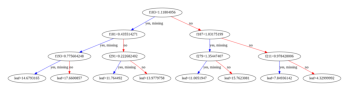

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

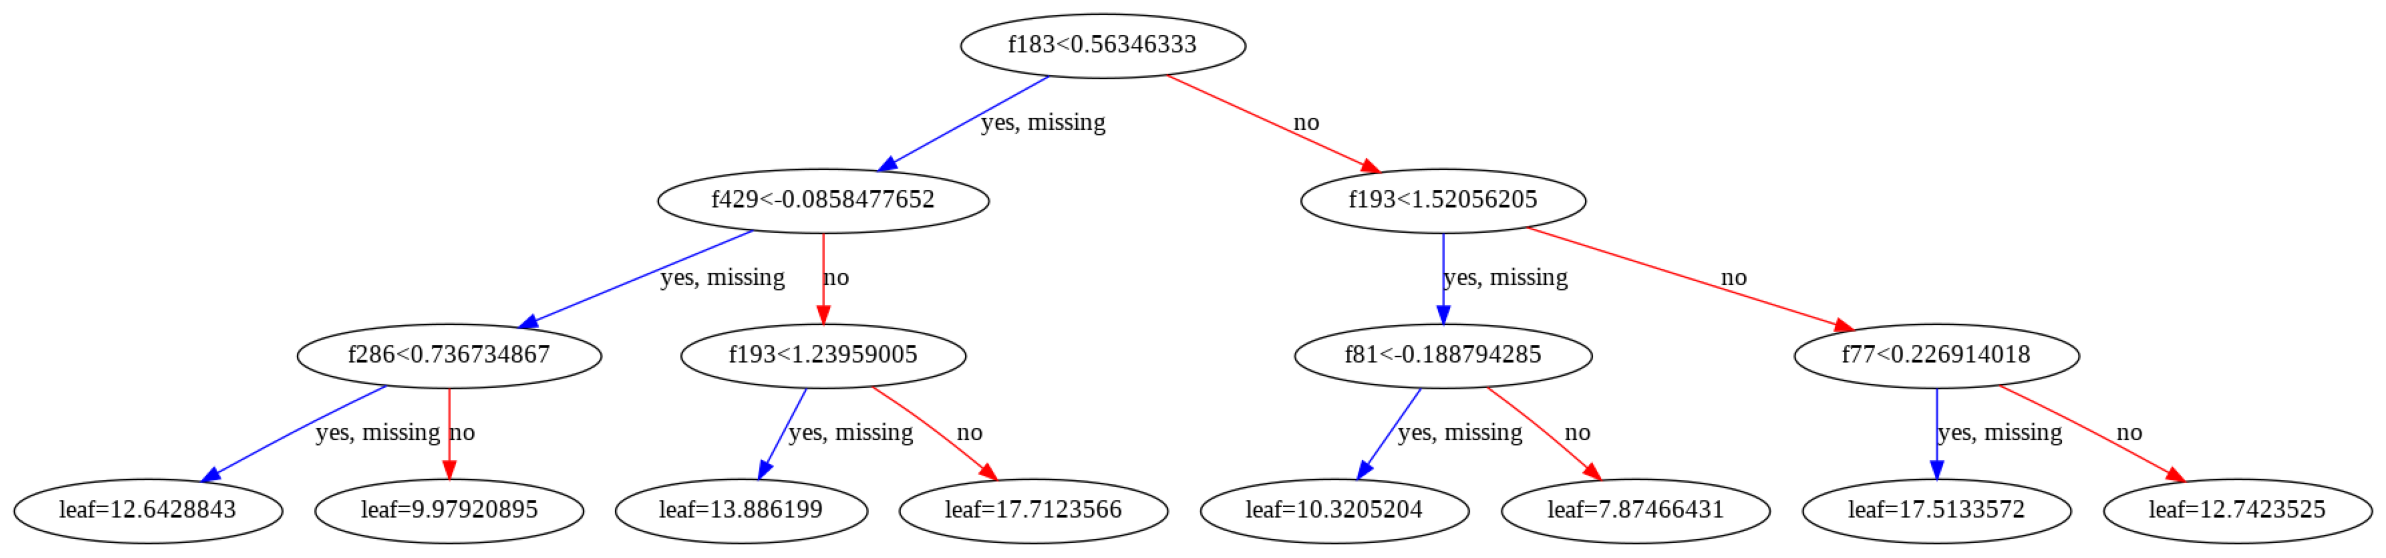

In [ ]:
xgb.plot_tree(xg_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
linear_reg.score(X_test, Y_test)

0.9203653546388972

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', gamma='auto', C=100)
svr_lin = SVR(kernel='linear', gamma='auto')
svr_poly = SVR(kernel='poly',C=90, gamma='auto', degree=2, epsilon=2, coef0=5)

In [ ]:
svr_lin.fit(X_train, Y_train)
svr_lin.score(X_test, Y_test)

0.9104182505766549

In [ ]:
svr_poly.fit(X_train, Y_train)
svr_poly.score(X_test, Y_test)

0.9388757345787484

In [ ]:
svr_rbf.fit(X_train, Y_train)
svr_rbf.score(X_test, Y_test)

0.9347761825975587

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train, Y_train)
ridge.score(X_test, Y_test)

0.9178671187944084

In [ ]:
from sklearn.linear_model import RidgeCV
rdgcv=RidgeCV(alphas=[0.001,0.01,0.1,1,2,3])
rdgcv.fit(X_train, Y_train)
rdgcv.score(X_test, Y_test)

0.9187115456753198

In [ ]:
from sklearn.linear_model import LassoCV
lso=LassoCV()
lso.fit(X_train, Y_train)
lso.score(X_test, Y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 551.574935128825, tolerance: 366.68041697499996
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549.5644179493538, tolerance: 366.68041697499996
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 768.9744236747501, tolerance: 366.68041697499996
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to incr

0.9123193528334643

In [ ]:
from sklearn.linear_model import LassoLarsCV
llcv=LassoLarsCV()
llcv.fit(X_train, Y_train)
llcv.score(X_test, Y_test)

0.9159579669046403

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada=AdaBoostRegressor(n_estimators=150, learning_rate=1.5, base_estimator=DecisionTreeRegressor(max_depth=10))
ada.fit(X_train, Y_train)
ada.score(X_test, Y_test)

0.9226792983116506

In [ ]:
import lightgbm as lgb
train_data=lgb.Dataset(X_train, label=Y_train)
param = {'num_leaves':200, 'objective':'regression','max_depth':3,'learning_rate':0.34,'max_bin':200}
model = lgb.train(param, train_data, 300)
ypred=model.predict(X_test)
metrics.r2_score(ypred,Y_test)

0.924669412051066